In [0]:
import keras

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install h5py

In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
filename = '/content/gdrive/My Drive/Files/SVHN_single_grey1.h5'
f = h5py.File(filename,'r')

In [0]:
# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())
print(a_group_key)

Keys: KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)
['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
x_train = np.array(f['X_train'])
y_train = np.array(f['y_train'])
x_val = np.array(f['X_val'])
y_val = np.array(f['y_val'])
x_test = np.array(f['X_test'])
y_test = np.array(f['y_test'])

In [0]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)


In [0]:
import cv2

In [0]:
def resize(data):
  return cv2.resize(data, dsize=(16,16), interpolation = cv2.INTER_LANCZOS4)

In [0]:
x_train_resize = np.zeros(shape =(42000,16,16))
x_test_resize = np.zeros(shape = (18000,16,16))
for i in range(0,len(x_train)):
  x_train_resize[i] = resize(x_train[i])
for i in range(0,len(x_test)):
  x_test_resize[i] = resize(x_test[i])  

In [0]:
x_train_reshape = x_train_resize.reshape(x_train_resize.shape[0],1024)
#x_train_reshape = x_train.reshape(x_train.shape[0],1024)
x_test_reshape = x_test_resize.reshape(x_test_resize.shape[0],1024)
#x_test_reshape = x_test.reshape(x_test.shape[0],1024)

In [0]:
scaler = StandardScaler()
eda_scaled = scaler.fit_transform(x_train_reshape)
eda_scaled_t = scaler.fit_transform(x_test_reshape)


In [0]:
def data_manipul(data):
  cov_matrix = np.cov(eda_scaled.T)
  e_vals, e_vecs = np.linalg.eig(cov_matrix)
  tot = sum(e_vals)
  var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)
  print("Cumulative Variance Explained", cum_var_exp)
  # Ploting 
  plt.figure(figsize=(10 , 5))
  plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
  plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principal Components')
  plt.legend(loc = 'best')
  plt.tight_layout()
  plt.show()

Cumulative Variance Explained [ 56.18107564  62.68060245  67.9733506   72.08604219  74.16920586
  75.92892632  77.61696905  79.05650722  80.38802268  81.52367619
  82.55476113  83.46346398  84.19004649  84.85930179  85.45537336
  86.02629461  86.55908166  87.08011032  87.56978632  88.00869437
  88.43634371  88.85482065  89.24692453  89.60901316  89.95119596
  90.2789009   90.59142609  90.89603275  91.19135217  91.47617956
  91.7465523   92.00905242  92.26041958  92.50434031  92.73371072
  92.95486024  93.17152563  93.37275313  93.57180203  93.76206459
  93.94473982  94.12329718  94.2925616   94.45762581  94.61511241
  94.76718676  94.91649138  95.06108531  95.19969625  95.33436707
  95.46849575  95.60033506  95.7261004   95.8466359   95.95962364
  96.07225886  96.1772443   96.28033467  96.38042214  96.48015028
  96.5765601   96.66607268  96.75155212  96.83466816  96.91487993
  96.99279656  97.0690497   97.14389477  97.21654303  97.28610205
  97.35437612  97.42013767  97.48529848  97.54

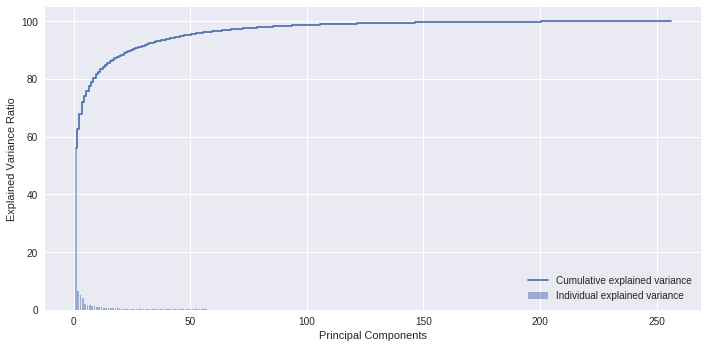

In [0]:
data_manipul(eda_scaled)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=45)
principalComponents = pca.fit_transform(eda_scaled)

In [0]:
principalComponents_t = pca.transform(eda_scaled_t)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [0]:
accuracies = []
for i in range(30,100,10):
  model = KNeighborsClassifier(n_neighbors=i, weights ='distance', p=1)
  model.fit(principalComponents, y_train)
  # evaluate the model and update the accuracies list
  score = model.score(principalComponents_t, y_test)
  print("k=%d, accuracy=%.2f%%" % (i, score * 100))
  accuracies.append(score)

k=30, accuracy=61.21%
k=40, accuracy=61.58%
k=50, accuracy=61.53%
k=60, accuracy=61.62%
k=70, accuracy=61.89%
k=80, accuracy=61.82%
k=90, accuracy=61.71%


From above, we can see an accuracy of 61.89% for k=70 and on using distance based weighted KNN and Manhattan Distance as the metric.

In [0]:
model_opti = KNeighborsClassifier(n_neighbors=70, weights = 'distance', p=1, algorithm = 'ball_tree' )
model_opti.fit(principalComponents, y_train)
# evaluate the model and update the accuracies list
y_pred = model_opti.predict(principalComponents_t)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
score = model_opti.score(principalComponents_t, y_test)
print('Overall Accuracy Score', score)

              precision    recall  f1-score   support

           0       0.55      0.75      0.63      1814
           1       0.53      0.77      0.63      1828
           2       0.77      0.60      0.68      1803
           3       0.58      0.49      0.53      1719
           4       0.72      0.73      0.72      1812
           5       0.61      0.52      0.56      1768
           6       0.62      0.51      0.56      1832
           7       0.74      0.69      0.72      1808
           8       0.57      0.53      0.55      1812
           9       0.60      0.57      0.58      1804

   micro avg       0.62      0.62      0.62     18000
   macro avg       0.63      0.62      0.62     18000
weighted avg       0.63      0.62      0.62     18000

Overall Accuracy Score 0.6189444444444444


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, Reshape, BatchNormalization
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
x_train = x_train.reshape(x_train.shape[0], 1,32,32).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1,32,32).astype('float32')
x_train /= 255
x_test /= 255

In [0]:
y_train_dum = keras.utils.to_categorical(y_train,num_classes=10)
y_test_dum = keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
 # Define Model
    model_cnn = Sequential()
    
    # 1st Conv Layer
    model_cnn.add(Convolution2D(32,(3, 3), input_shape=(1,32,32), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    #model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.2))


    # 2nd Conv Layer
    model_cnn.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.2))

    
     # 3rd Conv Layer
    model_cnn.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.2))
    
     
     # 4th Conv Layer
    model_cnn.add(Convolution2D(64,(3, 3), data_format='channels_first'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Activation('relu'))
    # Max Pooling
    #model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model_cnn.add(Dropout(0.25))
    
    # Fully Connected Layer
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(256, activation='relu'))
        
    # Prediction Layer
    model_cnn.add(Dense(10, activation = 'softmax'))
    
    # Loss and Optimizer
    model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model_cnn.fit(x_train, y_train_dum, batch_size=32, nb_epoch=20, 
              validation_data=(x_test, y_test_dum), callbacks = callback_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 28s 668us/step - loss: 1.7713 - acc: 0.3413 - val_loss: 0.6348 - val_acc: 0.8069
Epoch 2/20
42000/42000 [==============================] - 24s 565us/step - loss: 0.5189 - acc: 0.8396 - val_loss: 0.3620 - val_acc: 0.8943
Epoch 3/20
42000/42000 [==============================] - 24s 566us/step - loss: 0.3930 - acc: 0.8792 - val_loss: 0.3309 - val_acc: 0.9011
Epoch 4/20
42000/42000 [==============================] - 24s 566us/step - loss: 0.3430 - acc: 0.8945 - val_loss: 0.3155 - val_acc: 0.9060
Epoch 5/20
42000/42000 [==============================] - 24s 573us/step - loss: 0.3120 - acc: 0.9048 - val_loss: 0.2743 - val_acc: 0.9188
Epoch 6/20
42000/42000 [==============================] - 24s 574us/step - loss: 0.2859 - acc: 0.9131 - val_loss: 0.2621 - val_acc: 0.9234
Epoch 7/20
42000/42000 [==============================] - 24s 573us/step - loss: 0.2681 - acc: 0.9174 - val_loss: 0.

In [0]:
y_pred = model_cnn.predict_classes(x_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1814
           1       0.91      0.93      0.92      1828
           2       0.94      0.94      0.94      1803
           3       0.93      0.91      0.92      1719
           4       0.94      0.95      0.94      1812
           5       0.93      0.95      0.94      1768
           6       0.94      0.93      0.94      1832
           7       0.94      0.95      0.95      1808
           8       0.95      0.92      0.94      1812
           9       0.93      0.93      0.93      1804

   micro avg       0.94      0.94      0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000

